In [1]:
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.font_manager as fm

from matplotlib import rc

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

matplotlib.rc('font', family='Malgun Gothic') 
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
미국면적 = pd.read_csv('미국 면적.csv',encoding='CP949')
미국인구 = pd.read_csv('미국 인구.csv',encoding='CP949')
미국집값상승률 = pd.read_csv('미국 집값 상승률.csv',encoding='CP949')
미국집값 = pd.read_csv('미국 집값.csv',encoding='CP949')
미국이주율 = pd.read_csv('미국이주율.csv',encoding='CP949')

미국집값=미국집값.set_index('state')
미국이주율=미국이주율.set_index('state')
미국집값상승률=미국집값상승률.set_index('state')
미국인구=미국인구.set_index('state')
미국면적=미국면적.set_index('state')

미국집값상승률1=미국집값상승률[미국집값상승률['period']=='2020-Q4']
미국집값상승률2=미국집값상승률[미국집값상승률['period']=='2010-Q4']
미국집값상승률=pd.DataFrame(미국집값상승률1['index_sa']-미국집값상승률2['index_sa'])


미국데이터= pd.concat([(미국인구['population']),(미국면적['km2'])],axis=1)
미국데이터['인구밀도']=미국데이터['population']/미국데이터['km2']
미국데이터['이주율']=미국이주율['1000명당 이주율']
미국데이터['집값상승률']=(미국집값상승률)
미국데이터['미국집값']=미국집값['single-family']
미국데이터['미국집값']=미국데이터['미국집값']*1115.13/100000
미국데이터=미국데이터.drop(['D.C'])


In [3]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)


C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


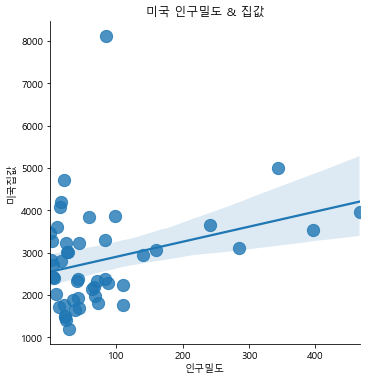

In [4]:
data = pd.concat([(미국데이터['인구밀도']),(미국데이터['미국집값'])],axis=1)
data.drop(data.index[8],inplace=True)
data.drop(data.index[10],inplace=True)
g=sns.lmplot('인구밀도','미국집값',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title("미국 인구밀도 & 집값")
plt.show(g)

In [5]:
from scipy import stats
from statsmodels.formula.api import ols, glm 
import statsmodels.api as sm
data=mean_norm(data)
m1 = ols ( '인구밀도~미국집값', data=data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   인구밀도   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     4.732
Date:                Tue, 27 Apr 2021   Prob (F-statistic):             0.0348
Time:                        17:35:26   Log-Likelihood:                -65.254
No. Observations:                  48   AIC:                             134.5
Df Residuals:                      46   BIC:                             138.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.714e-17      0.139  -6.99e-16      1.000      -0.280       0.280
미국집값           0.3054      0.140      2.175      0.035       0.023       0.588
==============================================================================
Omnibus:                       30.768   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.889
Skew:                           1.928   Prob(JB):                     6.00e-14
Kurtosis:                       6.947   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
data[['인구밀도','미국집값']].corr()

,인구밀도,미국집값
인구밀도,1.000000,0.305405
미국집값,0.305405,1.000000


Text(0.5, 1.0, '미국 집값')

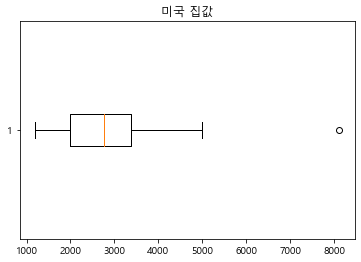

In [191]:
plt.boxplot(미국데이터['미국집값'], vert=False)
plt.title("미국 집값")

Text(0.5, 1.0, '미국 인구밀도')

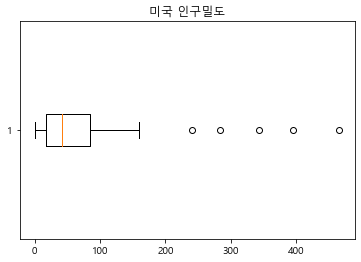

In [192]:
plt.boxplot(미국데이터['인구밀도'], vert=False)
plt.title("미국 인구밀도")

Text(0.5, 1.0, '미국 집값')

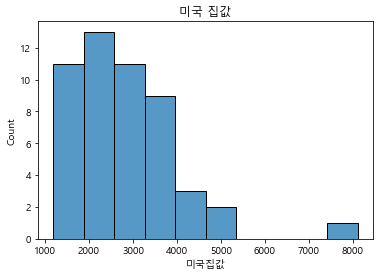

In [218]:
sns.histplot(x='미국집값', data=미국데이터)
plt.title("미국 집값")

Text(0.5, 1.0, '미국 집값')

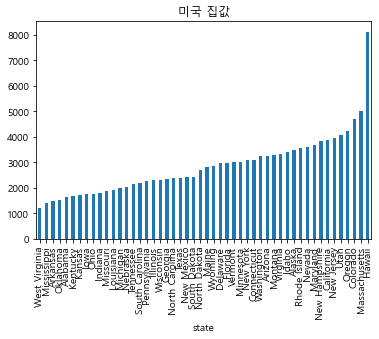

In [219]:
(미국데이터['미국집값']).sort_values().plot(kind='bar')
plt.title("미국 집값")

Text(0.5, 1.0, '미국 인구')

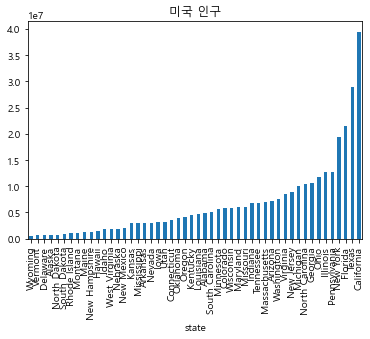

In [220]:
(미국데이터['population']).sort_values().plot(kind='bar')
plt.title("미국 인구")

Text(0.5, 1.0, '미국 인구 x 집값')

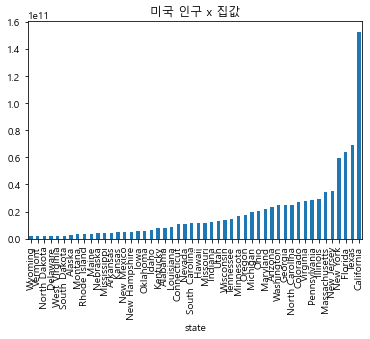

In [225]:
(미국데이터['미국집값']*미국데이터['population']).sort_values().plot(kind='bar')
plt.title("미국 인구 x 집값")

In [11]:
np.std((미국데이터['미국집값']*미국데이터['population']))

24629468421.647083

In [12]:
(미국데이터['미국집값']*미국데이터['population']).sum()/(미국데이터['population'].sum())

2835.3142699897176

In [194]:
국내집값 = pd.read_csv('국내집값.csv',encoding='CP949')
국내집값=국내집값[국내집값['지역별(2)'].isin(['서울','인천','경기','부산','대구','광주','대전','울산','세종','강원','충북','충남','전북','전남','경북','경남','제주'])]
국내집값=국내집값.set_index('지역별(2)')
국내집값=국내집값.loc[:,['2015. 10','2015. 11','2015. 12',
         '2016. 01','2016. 02','2016. 03','2016. 04','2016. 05','2016. 06','2016. 07','2016. 08','2016. 09','2016. 10','2016. 11','2016. 12',
         '2017. 01','2017. 02','2017. 03','2017. 04','2017. 05','2017. 06','2017. 07','2017. 08','2017. 09','2017. 10','2017. 11','2017. 12',
         '2018. 01','2018. 02','2018. 03','2018. 04','2018. 05','2018. 06','2018. 07','2018. 08','2018. 09','2018. 10','2018. 11','2018. 12',
         '2019. 01','2019. 02','2019. 03','2019. 04','2019. 05','2019. 06','2019. 07','2019. 08','2019. 09','2019. 10','2019. 11','2019. 12',
         '2020. 01','2020. 02','2020. 03','2020. 04','2020. 05','2020. 06','2020. 07','2020. 08','2020. 09','2020. 10','2020. 11','2020. 12',
         '2021. 01','2021. 02']]
국내집값=국내집값.fillna(3000)

국내집값=국내집값.astype(int)
국내집값=국내집값
국내인구밀도 = pd.read_csv('국내인구밀도.csv',encoding='CP949')
국내인구밀도=국내인구밀도.set_index('지역')
국내인구밀도=국내인구밀도.astype(int)
국내인구밀도['2020인구밀도']=국내인구밀도['2020인구밀도']*1000
국내인구밀도=국내인구밀도.drop(['수도권'])

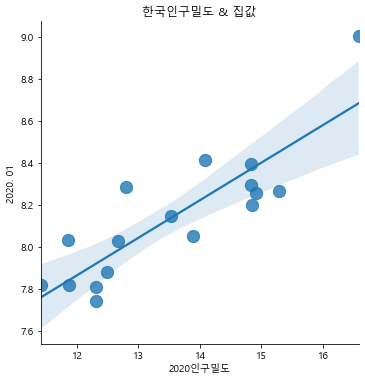

In [195]:
data = pd.concat([np.log(국내인구밀도['2020인구밀도']),np.log(국내집값['2020. 01'])],axis=1)
g=sns.lmplot('2020인구밀도','2020. 01',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title('한국인구밀도 & 집값')
plt.show(g)

In [15]:
data=data.rename({'2020인구밀도':'인구밀도','2020. 01':'집값'},axis='columns')
data=mean_norm(data)

In [16]:
m1 = ols ( '인구밀도~집값', data=data).fit()
m1.summary()

C:\Users\KimSungYong\anaconda3\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   인구밀도   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     89.09
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           1.06e-07
Time:                        17:35:27   Log-Likelihood:                -7.1404
No. Observations:                  17   AIC:                             18.28
Df Residuals:                      15   BIC:                             19.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.327e-17      0.095   8.76e-16      1.000      -0.203       0.203
집값             0.9251      0.098      9.439      0.000       0.716       1.134
==============================================================================
Omnibus:                        2.440   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.544
Skew:                          -0.734   Prob(JB):                        0.462
Kurtosis:                       2.841   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
data[['인구밀도','집값']].corr()

,인구밀도,집값
인구밀도,1.000000,0.925145
집값,0.925145,1.000000


Text(0.5, 1.0, '한국 집값')

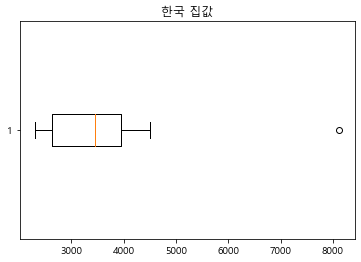

In [196]:
plt.boxplot(국내집값['2020. 01'], vert=False)
plt.title('한국 집값')

Text(0.5, 1.0, '한국 인구밀도')

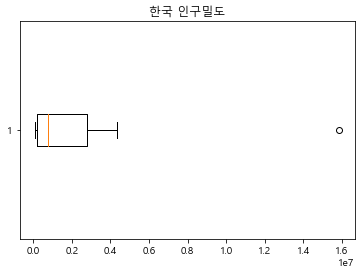

In [197]:
plt.boxplot(국내인구밀도['2020인구밀도'], vert=False)
plt.title('한국 인구밀도')

Text(0.5, 1.0, '한국 집값')

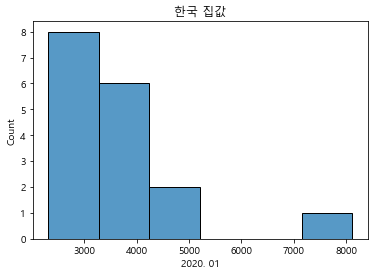

In [232]:
sns.histplot(x='2020. 01', data=국내집값)
plt.title('한국 집값')

Text(0.5, 1.0, '한국 집값')

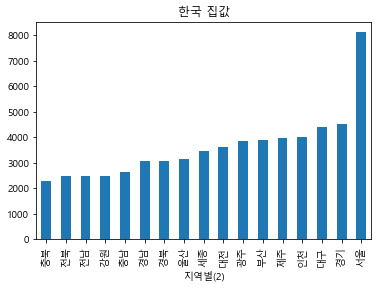

In [227]:
(국내집값['2020. 01']).sort_values().plot(kind='bar')
plt.title('한국 집값')

Text(0.5, 1.0, '한국 인구')

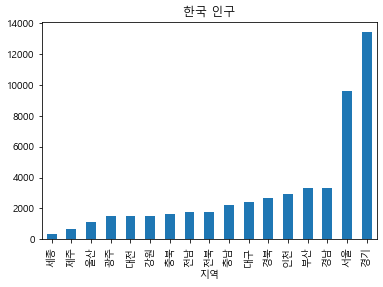

In [223]:
(국내인구밀도['2020인구']).sort_values().plot(kind='bar')
plt.title('한국 인구')

Text(0.5, 1.0, '한국 인구 x 집값')

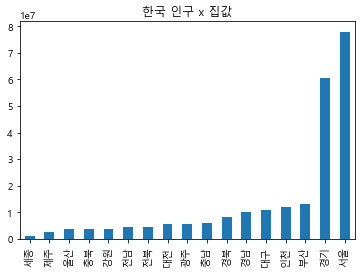

In [229]:
(국내인구밀도['2020인구']*국내집값['2020. 01']).sort_values().plot(kind='bar')
plt.title('한국 인구 x 집값')

Text(0.5, 1.0, '한국 인구 x 집값')

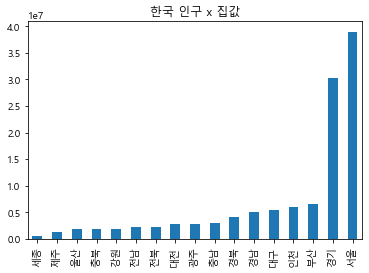

In [231]:
((국내인구밀도['2020인구'])*국내집값['2020. 01']).sort_values().plot(kind='bar')
plt.title('한국 인구 x 집값')

In [22]:
주택거래량 = pd.read_csv('주택거래량.csv',encoding='CP949')
#주택거래량=주택거래량.astype(int)

In [23]:
주택거래량0=주택거래량[주택거래량['년']==2021]
주택거래량1=주택거래량[주택거래량['년']==2020]
주택거래량2=주택거래량[주택거래량['년']==2019]
주택거래량3=주택거래량[주택거래량['년']==2018]
주택거래량4=주택거래량[주택거래량['년']==2017]
주택거래량5=주택거래량[주택거래량['년']==2016]
주택거래량6=주택거래량[주택거래량['년']==2015]
주택거래량7=주택거래량[주택거래량['년']==2014]
주택거래량8=주택거래량[주택거래량['년']==2013]
주택거래량9=주택거래량[주택거래량['년']==2012]

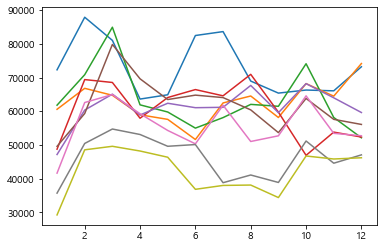

In [24]:
plt.plot(주택거래량1['월'],주택거래량1['전체'])
plt.plot(주택거래량2['월'],주택거래량2['전체'])
plt.plot(주택거래량3['월'],주택거래량3['전체'])
plt.plot(주택거래량4['월'],주택거래량4['전체'])
plt.plot(주택거래량5['월'],주택거래량5['전체'])
plt.plot(주택거래량6['월'],주택거래량6['전체'])
plt.plot(주택거래량7['월'],주택거래량7['전체'])
plt.plot(주택거래량8['월'],주택거래량8['전체'])
plt.plot(주택거래량9['월'],주택거래량9['전체'])

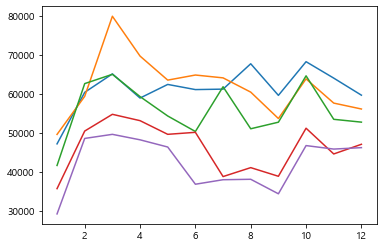

In [25]:
plt.plot(주택거래량5['월'],주택거래량5['전체'])
plt.plot(주택거래량6['월'],주택거래량6['전체'])
plt.plot(주택거래량7['월'],주택거래량7['전체'])
plt.plot(주택거래량8['월'],주택거래량8['전체'])
plt.plot(주택거래량9['월'],주택거래량9['전체'])

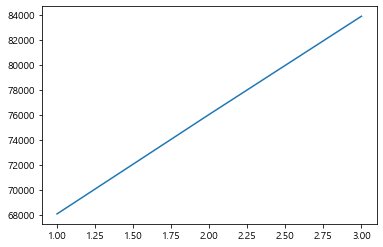

In [26]:
plt.plot(주택거래량0['월'],주택거래량0['전체'])

In [27]:
국내이동1 = pd.read_csv('국내이동1.csv',encoding='CP949')

C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

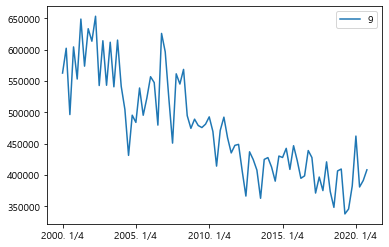

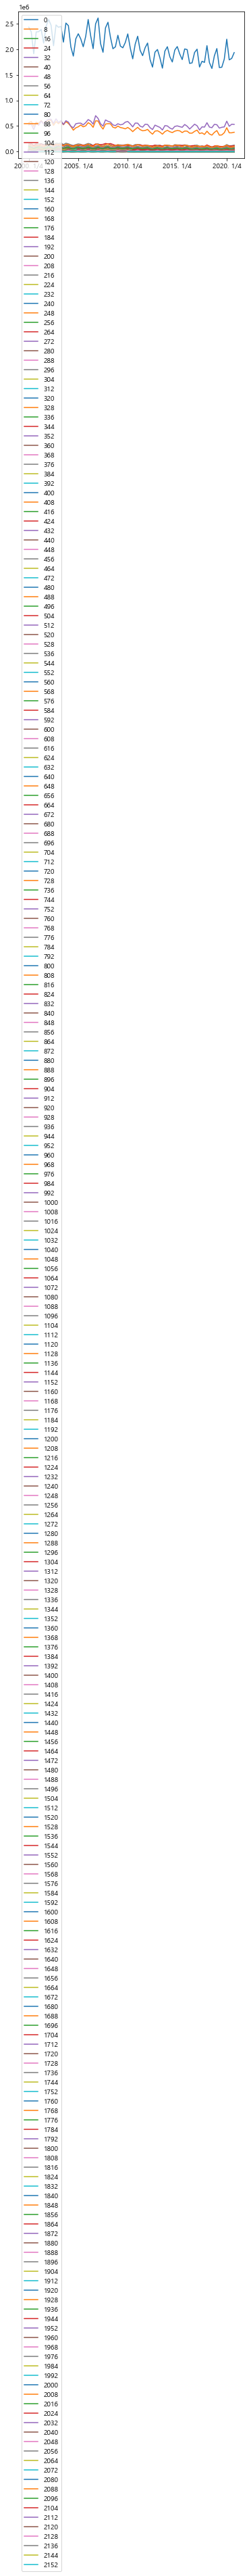

In [198]:
서울총전입 = 국내이동1.loc[(국내이동1['항목']=='총전입')]
del 서울총전입['행정구역(시군구)별']
del 서울총전입['항목']
del 서울총전입['단위']
서울총전출 = 국내이동1.loc[(국내이동1['행정구역(시군구)별']=='서울특별시') & (국내이동1['항목']=='총전출')]
del 서울총전출['행정구역(시군구)별']
del 서울총전출['항목']
del 서울총전출['단위']
서울총전출.transpose().plot()
서울총전입.transpose().plot()

Text(0.5, 1.0, '전입 수')

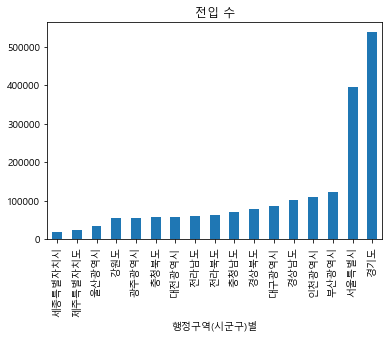

In [202]:
국내전입= 국내이동1.loc[(국내이동1['항목']=='총전입')&((국내이동1['행정구역(시군구)별']=='세종특별자치시')|(국내이동1['행정구역(시군구)별']=='서울특별시')|(국내이동1['행정구역(시군구)별']=='부산광역시')|(국내이동1['행정구역(시군구)별']=='대구광역시')|(국내이동1['행정구역(시군구)별']=='대전광역시')|(국내이동1['행정구역(시군구)별']=='인천광역시')|(국내이동1['행정구역(시군구)별']=='울산광역시')|(국내이동1['행정구역(시군구)별']=='광주광역시')|(국내이동1['행정구역(시군구)별']=='충청북도')|(국내이동1['행정구역(시군구)별']=='충청남도')|(국내이동1['행정구역(시군구)별']=='전라북도')|(국내이동1['행정구역(시군구)별']=='전라남도')|(국내이동1['행정구역(시군구)별']=='경상북도')|(국내이동1['행정구역(시군구)별']=='경상남도')|(국내이동1['행정구역(시군구)별']=='강원도')|(국내이동1['행정구역(시군구)별']=='경기도')|(국내이동1['행정구역(시군구)별']=='제주특별자치도'))]
국내전입=국내전입.set_index('행정구역(시군구)별')
국내전입=(국내전입['2020. 1/4']+국내전입['2020. 2/4']+국내전입['2020. 3/4']+국내전입['2020. 4/4'])/4
국내전입.sort_values().plot(kind='bar')

plt.title('전입 수')

Text(0.5, 1.0, '전출 수')

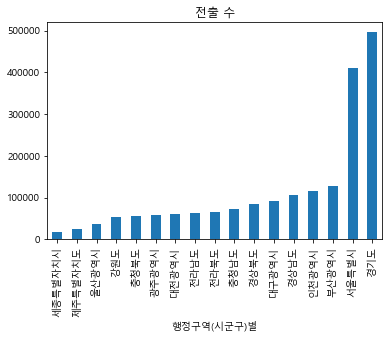

In [203]:
국내전출= 국내이동1.loc[(국내이동1['항목']=='총전출')&((국내이동1['행정구역(시군구)별']=='세종특별자치시')|(국내이동1['행정구역(시군구)별']=='서울특별시')|(국내이동1['행정구역(시군구)별']=='부산광역시')|(국내이동1['행정구역(시군구)별']=='대구광역시')|(국내이동1['행정구역(시군구)별']=='대전광역시')|(국내이동1['행정구역(시군구)별']=='인천광역시')|(국내이동1['행정구역(시군구)별']=='울산광역시')|(국내이동1['행정구역(시군구)별']=='광주광역시')|(국내이동1['행정구역(시군구)별']=='충청북도')|(국내이동1['행정구역(시군구)별']=='충청남도')|(국내이동1['행정구역(시군구)별']=='전라북도')|(국내이동1['행정구역(시군구)별']=='전라남도')|(국내이동1['행정구역(시군구)별']=='경상북도')|(국내이동1['행정구역(시군구)별']=='경상남도')|(국내이동1['행정구역(시군구)별']=='강원도')|(국내이동1['행정구역(시군구)별']=='경기도')|(국내이동1['행정구역(시군구)별']=='제주특별자치도'))]
국내전출=국내전출.set_index('행정구역(시군구)별')
국내전출=(국내전출['2020. 1/4']+국내전출['2020. 2/4']+국내전출['2020. 3/4']+국내전출['2020. 4/4'])/4
국내전출.sort_values().plot(kind='bar')
plt.title('전출 수')

Text(0.5, 1.0, '전출-전입 수')

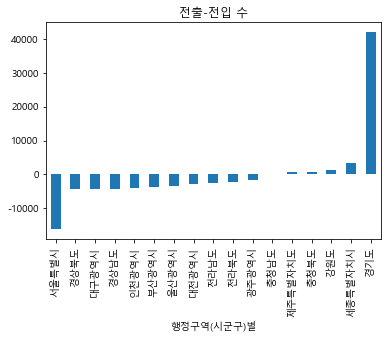

In [204]:
(국내전입-국내전출).sort_values().plot(kind='bar')
plt.title('전출-전입 수')

In [205]:
국내인구=국내인구밀도['2020인구']
국내인구=국내인구.rename({'세종':'세종특별자치시','서울':'서울특별시','부산':'부산광역시','대구':'대구광역시','대전':'대전광역시','광주':'광주광역시','울산':'울산광역시','인천':'인천광역시','경기':'경기도','강원':'강원도','충북':'충청북도','충남':'충청남도','전북':'전라북도','전남':'전라남도','경북':'경상북도','경남':'경상남도','제주':'제주특별자치도'},axis='index')
국내인구

지역
서울특별시       9602
부산광역시       3344
대구광역시       2419
인천광역시       2951
광주광역시       1488
대전광역시       1500
울산광역시       1140
세종특별자치시      349
경기도        13405
강원도         1515
충청북도        1632
충청남도        2204
전라북도        1792
전라남도        1764
경상북도        2655
경상남도        3350
제주특별자치도      670
Name: 2020인구, dtype: int32

Text(0.5, 1.0, '전입 수 / 인구 수')

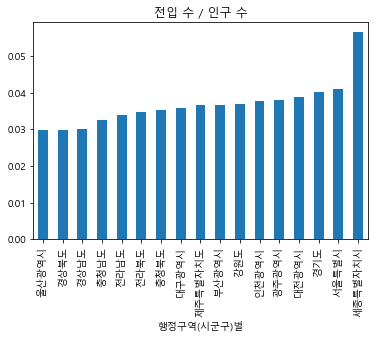

In [206]:
(국내전입/(국내인구*1000)).sort_values().plot(kind='bar')
plt.title('전입 수 / 인구 수')

Text(0.5, 1.0, '전출 수 / 인구 수')

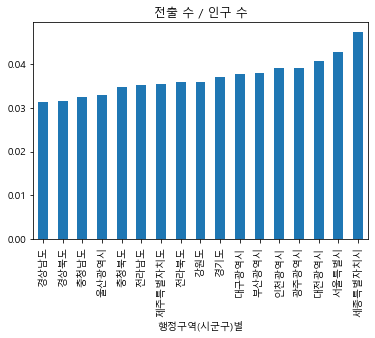

In [207]:
(국내전출/(국내인구*1000)).sort_values().plot(kind='bar')
plt.title('전출 수 / 인구 수')

Text(0.5, 1.0, '(전출 수 - 전입 수) / 인구 수')

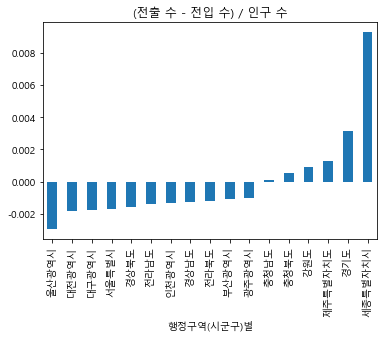

In [208]:
((국내전입-국내전출)/(국내인구*1000)).sort_values().plot(kind='bar')
plt.title('(전출 수 - 전입 수) / 인구 수')

Text(0.5, 1.0, '인구 수')

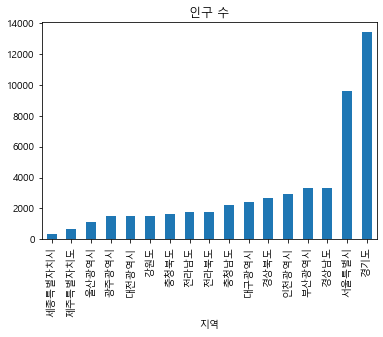

In [209]:
국내인구.sort_values().plot(kind='bar')
plt.title('인구 수')

In [36]:
국내전출입=((국내전입-국내전출)/국내인구*1000)
국내전출입=국내전출입.to_frame(name='value')
국내전출입

,value
행정구역(시군구)별,
서울특별시,-1688.450323
부산광역시,-1072.592703
대구광역시,-1739.871848
인천광역시,-1334.124026
광주광역시,-1022.009409
대전광역시,-1849.500000
울산광역시,-2978.947368
세종특별자치시,9330.229226
경기도,3140.115628


In [37]:
국내집값=국내집값.rename({'세종':'세종특별자치시','서울':'서울특별시','부산':'부산광역시','대구':'대구광역시','대전':'대전광역시','광주':'광주광역시','울산':'울산광역시','인천':'인천광역시','경기':'경기도','강원':'강원도','충북':'충청북도','충남':'충청남도','전북':'전라북도','전남':'전라남도','경북':'경상북도','경남':'경상남도','제주':'제주특별자치도'},axis='index')


In [213]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import matplotlib.cm as cm
국내이동2 = pd.read_csv('국내이동2.csv',encoding='CP949')
국내이동2=국내이동2.loc[(국내이동2['항목']=='순이동자수')&(국내이동2['전출지별']!='전국')&(국내이동2['전입지별']!='전국')]
                                        
국내이동2['2020']=국내이동2['2020. 01 월']+국내이동2['2020. 02 월']+국내이동2['2020. 03 월']+국내이동2['2020. 04 월']+국내이동2['2020. 05 월']+국내이동2['2020. 06 월']+국내이동2['2020. 07 월']+국내이동2['2020. 08 월']+국내이동2['2020. 09 월']+국내이동2['2020. 10 월']+국내이동2['2020. 11 월']+국내이동2['2020. 12 월']
국내이동2_1=국내이동2[국내이동2['2020']>0]

국내이동피벗=pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 11 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 12 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 01 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 02 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 03 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 04 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 05 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 06 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 07 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 08 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 09 월')
#
국내이동피벗2=국내이동피벗/(국내인구)

국내이동피벗

전입지별,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
전출지별,,,,,,,,,,,,,,,,,
강원도,0,-1317,-775,-1413,-254,-861,274,-539,-982,281,-580,-2386,-489,-69,-163,240,-770
경기도,1317,0,-11569,-14969,-6465,-12410,-7609,-10790,-208671,528,-5649,-32905,-4886,-6453,2552,-7447,-335
경상남도,775,11569,0,742,290,2271,1618,-4167,13661,616,-1070,1341,1098,572,573,1811,1386
경상북도,1413,14969,-742,0,84,-370,2301,1632,11840,1010,-4192,834,219,361,386,2424,2352
광주광역시,254,6465,-290,-84,0,-126,723,74,8008,589,-32,660,-5832,-604,83,993,449
대구광역시,861,12410,-2271,370,126,0,1232,1525,12497,706,-646,1029,76,53,529,1490,1332
대전광역시,-274,7609,-1618,-2301,-723,-1232,0,-536,8001,13183,-333,202,-719,-1306,206,-466,1007
부산광역시,539,10790,4167,-1632,-74,-1525,536,0,15117,698,-4844,1149,164,355,10,1327,589
서울특별시,982,208671,-13661,-11840,-8008,-12497,-8001,-15117,0,603,-5794,2457,-5760,-6988,853,-3265,-3247


In [212]:
국내이동피벗2.round(2)

,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
전출지별,,,,,,,,,,,,,,,,,
강원도,0.00,-0.10,-0.23,-0.53,-0.17,-0.36,0.18,-0.16,-0.10,0.81,-0.51,-0.81,-0.28,-0.04,-0.24,0.11,-0.47
경기도,0.87,0.00,-3.45,-5.64,-4.34,-5.13,-5.07,-3.23,-21.73,1.51,-4.96,-11.15,-2.77,-3.60,3.81,-3.38,-0.21
경상남도,0.51,0.86,0.00,0.28,0.19,0.94,1.08,-1.25,1.42,1.77,-0.94,0.45,0.62,0.32,0.86,0.82,0.85
경상북도,0.93,1.12,-0.22,0.00,0.06,-0.15,1.53,0.49,1.23,2.89,-3.68,0.28,0.12,0.20,0.58,1.10,1.44
광주광역시,0.17,0.48,-0.09,-0.03,0.00,-0.05,0.48,0.02,0.83,1.69,-0.03,0.22,-3.31,-0.34,0.12,0.45,0.28
대구광역시,0.57,0.93,-0.68,0.14,0.08,0.00,0.82,0.46,1.30,2.02,-0.57,0.35,0.04,0.03,0.79,0.68,0.82
대전광역시,-0.18,0.57,-0.48,-0.87,-0.49,-0.51,0.00,-0.16,0.83,37.77,-0.29,0.07,-0.41,-0.73,0.31,-0.21,0.62
부산광역시,0.36,0.80,1.24,-0.61,-0.05,-0.63,0.36,0.00,1.57,2.00,-4.25,0.39,0.09,0.20,0.01,0.60,0.36
서울특별시,0.65,15.57,-4.08,-4.46,-5.38,-5.17,-5.33,-4.52,0.00,1.73,-5.08,0.83,-3.27,-3.90,1.27,-1.48,-1.99


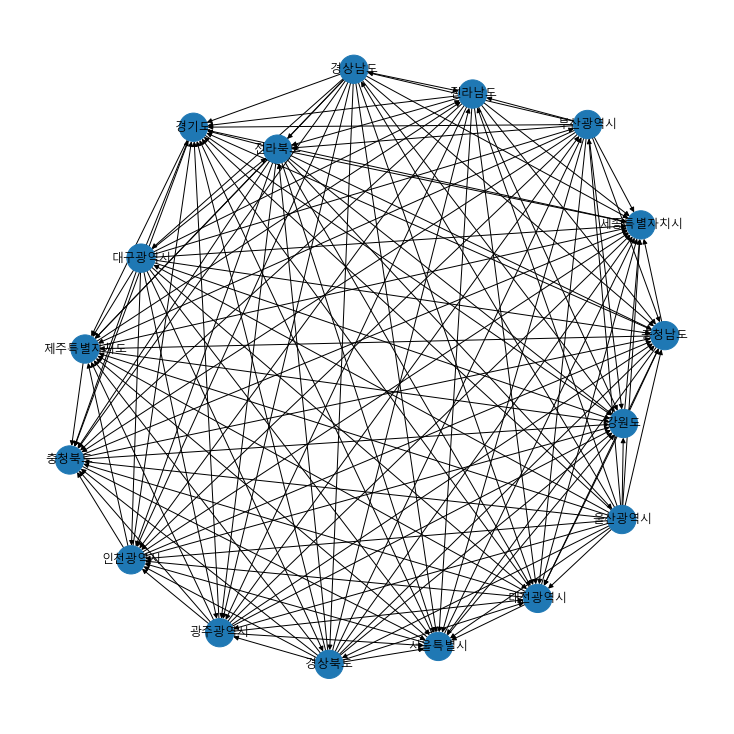

In [186]:

G_net = nx.from_pandas_edgelist(국내이동2_1, source = '전출지별', target = '전입지별', edge_attr = '2020',create_using = nx.DiGraph())

d = dict(G_net.degree)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G_net,10)
#for edge in G_net.edges(data='2020'):
nx.draw(G_net, pos,font_family=font_name, node_size = [(50*v) for v in d.values()], with_labels = True)
plt.show()

<AxesSubplot:ylabel='전출지별'>

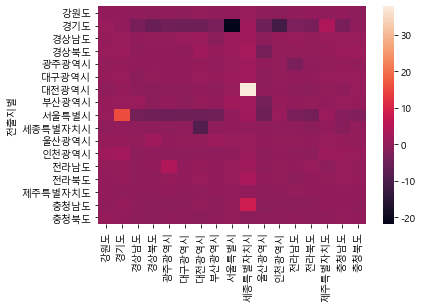

In [171]:
sns.heatmap(국내이동피벗  )